In [3]:
import os
import numpy as np
import random as rn

SEED = 42
os.environ['PYTHONHASHSEED'] = str(SEED)
np.random.seed(SEED)
rn.seed(SEED)

import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.utils import np_utils

Using TensorFlow backend.


In [4]:
# Funciones auxiliares: dibujar frontera de decisión
#
def dibujar_frontera(X,Y,modelo,titulo):
    # Valor mínimo y máximo y rellenado con ceros
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01

    # Grilla de puntos
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predecir categorías para cada punto en la gruilla
    Z = modelo.predict_classes(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    fig = plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Set1, alpha=0.8)

    Y = np.argmax(Y,axis=1)
    idx0 = np.where(Y==0)
    idx1 = np.where(Y==1)
    idx2 = np.where(Y==2)
    plt.scatter(X[idx0,0],X[idx0,1],c=(1,0,0), edgecolor='k', label='Iris setosa')
    plt.scatter(X[idx1,0],X[idx1,1],c=(124./255.,44./255.,169./255.),edgecolor='k', label='Iris-versicolor')
    plt.scatter(X[idx2,0],X[idx2,1],c=(128./255.,128./255.,128./255.),edgecolor='k', label='Iris-virginica')
    plt.legend(fontsize=8,loc='upper right')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(titulo)

    plt.xlabel('SepalLengthCm')
    plt.ylabel('SepalWidthCm')
    plt.show()


In [5]:
datos = pd.read_csv('iris.csv',usecols=[1, 2, 3, 4, 5])
datos.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
X = datos.iloc[:,0:-1].values
Y_str = datos.iloc[:,-1:].values

In [7]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [8]:
Y_str[:5]

array([['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa']], dtype=object)

In [9]:
datos['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [10]:
# Convertir "labels" de caracteres a números
encoder = LabelEncoder()
encoder.fit(Y_str)
Y_num = encoder.transform(Y_str)
Y_num[:5]

/home/villacorta/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/villacorta/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 0, 0, 0])

In [11]:
# Convertir "Y_num" a representación "one-hot", requerida por Keras durante
# el entrenamiento
n_clases = 3
Y = np_utils.to_categorical(Y_num,n_clases)
Y[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


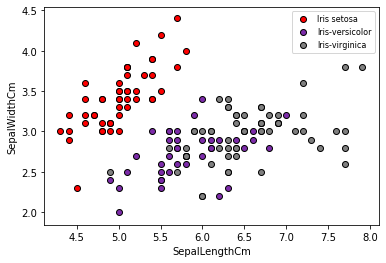

In [12]:
# Graficar los datos
idx0 = np.where(Y_num==0)
idx1 = np.where(Y_num==1)
idx2 = np.where(Y_num==2)
plt.scatter(X[idx0,0],X[idx0,1],c=(1,0,0), edgecolor='k', label='Iris setosa')
plt.scatter(X[idx1,0],X[idx1,1],c=(124./255.,44./255.,169./255.),edgecolor='k', label='Iris-versicolor')
plt.scatter(X[idx2,0],X[idx2,1],c=(128./255.,128./255.,128./255.),edgecolor='k', label='Iris-virginica')
plt.legend(fontsize=8,loc='upper right')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.show()

In [13]:
# Para reproducibilidad del entrenamiento
input_dim = X.shape[1]
output_dim = Y.shape[1]

input_dim, output_dim

(4, 3)

In [14]:
modelo = Sequential()
modelo.add(
    Dense(output_dim, input_dim=input_dim, activation='softmax')
)

In [17]:
# Optimizador, tasa de aprendizaje, función de pérdida y métrica de desempeño
sgd = SGD(lr=0.1)
modelo.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [18]:
n_its = 1000
batch_size = X.shape[0]

batch_size

150

In [19]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [24]:
historia = modelo.fit(
    X, Y,
    epochs=n_its,
    batch_size=batch_size,
    validation_split=0.1,
    verbose=1
)

Train on 135 samples, validate on 15 samples
Epoch 1/1000
135/135 [==============================] - 0s 35us/step - loss: 0.1247 - accuracy: 0.9778 - val_loss: 0.2315 - val_accuracy: 1.0000
Epoch 2/1000
135/135 [==============================] - 0s 36us/step - loss: 0.1247 - accuracy: 0.9778 - val_loss: 0.2314 - val_accuracy: 1.0000
Epoch 3/1000
135/135 [==============================] - 0s 40us/step - loss: 0.1246 - accuracy: 0.9778 - val_loss: 0.2313 - val_accuracy: 1.0000
Epoch 4/1000
135/135 [==============================] - 0s 34us/step - loss: 0.1245 - accuracy: 0.9778 - val_loss: 0.2312 - val_accuracy: 1.0000
Epoch 5/1000
135/135 [==============================] - 0s 24us/step - loss: 0.1245 - accuracy: 0.9778 - val_loss: 0.2311 - val_accuracy: 1.0000
Epoch 6/1000
135/135 [==============================] - 0s 32us/step - loss: 0.1244 - accuracy: 0.9778 - val_loss: 0.2309 - val_accuracy: 1.0000
Epoch 7/1000
135/135 [==============================] - 0s 39us/step - loss: 0.1244 -

In [21]:
historia.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

In [22]:
train_loss = historia.history.get('loss')
val_loss   = historia.history.get('val_loss')
train_acc  = historia.history.get('accuracy')
val_acc    = historia.history.get('val_accuracy')

if train_loss:
    print('train_loss: ', train_loss[-1])
if val_loss:
    print('val_loss: ', val_loss[-1])
if train_acc:
    print('accuracy: ', train_acc[-1])
if val_acc:
    print('val_accuracy: ', val_acc[-1])

train_loss:  0.12475773692131042
val_loss:  0.23156189918518066
accuracy:  0.9777778
val_accuracy:  1.0


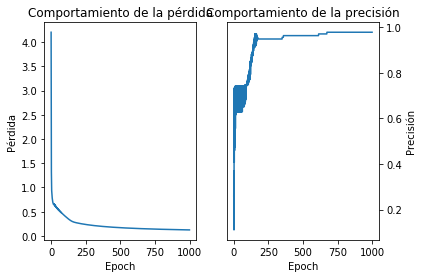

In [23]:
# Graficar comportamiento de la pérdida y de la precisión
plt.subplot(1,2,1)
plt.plot(historia.history['loss'])
plt.ylabel('Pérdida')
plt.xlabel('Epoch')
plt.title('Comportamiento de la pérdida')

plt.subplot(1,2,2)
plt.plot(historia.history.get('accuracy'))
plt.ylabel('Precisión')
plt.xlabel('Epoch')
plt.title('Comportamiento de la precisión')

ax = plt.gca()
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()

plt.show()